In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
df = pd.read_csv("C:\\Users\\ancha\\OneDrive\\Desktop\\superstore.csv",encoding="windows-1252")

In [8]:
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].median())



In [10]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("After cleaning shape:", df.shape)

After cleaning shape: (31775, 27)


In [13]:
stats_summary = df.describe(include='all')
print("\nStatistical Summary:\n", stats_summary)



Statistical Summary:
        Product Categories           City        Country Customer.ID  \
count               31775          31775          31775       31775   
unique                  3           3189            136        4683   
top       Office Supplies  New York City  United States   AP-109154   
freq                23648            641           6477          26   
mean                  NaN            NaN            NaN         NaN   
std                   NaN            NaN            NaN         NaN   
min                   NaN            NaN            NaN         NaN   
25%                   NaN            NaN            NaN         NaN   
50%                   NaN            NaN            NaN         NaN   
75%                   NaN            NaN            NaN         NaN   
max                   NaN            NaN            NaN         NaN   

       Customer.Name      Discount Market      ??? Order.Date      Order.ID  \
count          31775  31775.000000  31775  31

In [14]:
corr_matrix = df.corr(numeric_only=True)
print("\nCorrelation Matrix:\n", corr_matrix)



Correlation Matrix:
                Discount  ???    Profit  Quantity    Row.ID     Sales  \
Discount       1.000000  NaN -0.483185  0.073907 -0.173452 -0.082976   
???                 NaN  NaN       NaN       NaN       NaN       NaN   
Profit        -0.483185  NaN  1.000000  0.126322  0.054485  0.501600   
Quantity       0.073907  NaN  0.126322  1.000000 -0.206074  0.235238   
Row.ID        -0.173452  NaN  0.054485 -0.206074  1.000000 -0.058713   
Sales         -0.082976  NaN  0.501600  0.235238 -0.058713  1.000000   
Shipping.Cost -0.074666  NaN  0.387149  0.204338 -0.056289  0.747016   
Year           0.011512  NaN -0.012179 -0.009746  0.004946 -0.006106   
weeknum        0.020217  NaN -0.006448  0.024057 -0.029399 -0.006349   

               Shipping.Cost      Year   weeknum  
Discount           -0.074666  0.011512  0.020217  
???                      NaN       NaN       NaN  
Profit              0.387149 -0.012179 -0.006448  
Quantity            0.204338 -0.009746  0.024057  
Ro

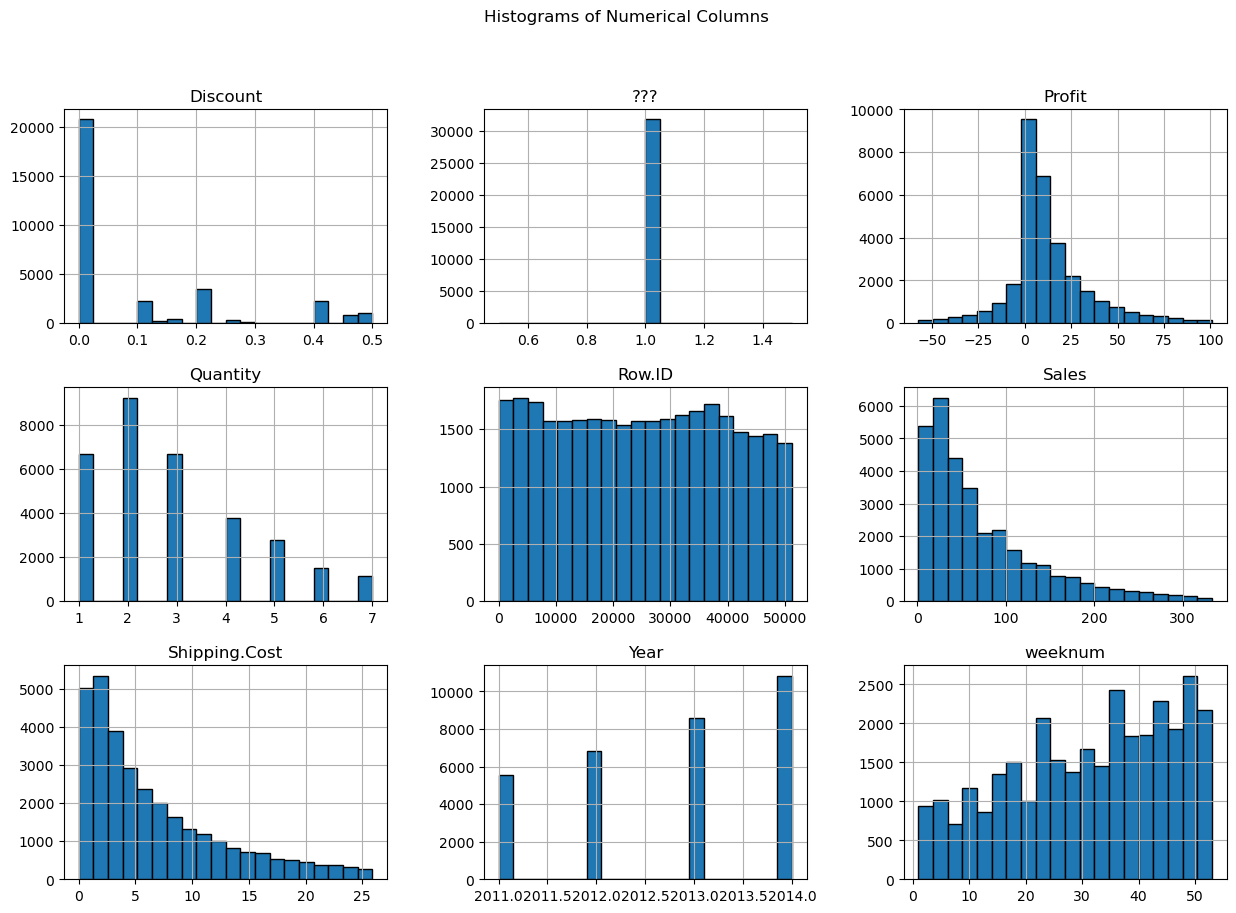

In [15]:
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histograms of Numerical Columns")
plt.show()


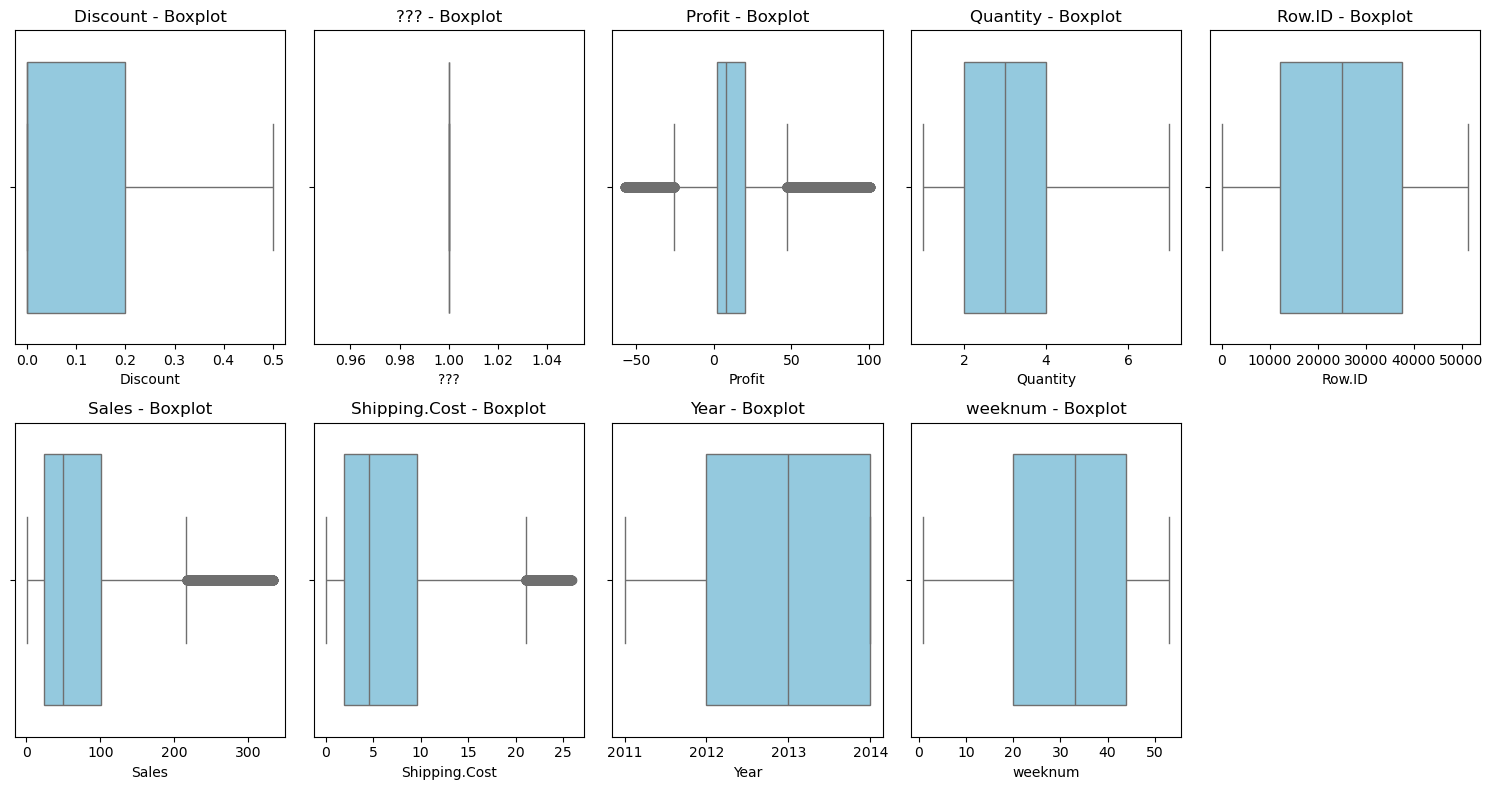

In [16]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, len(numeric_cols)//2 + 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"{col} - Boxplot")
plt.tight_layout()
plt.show()

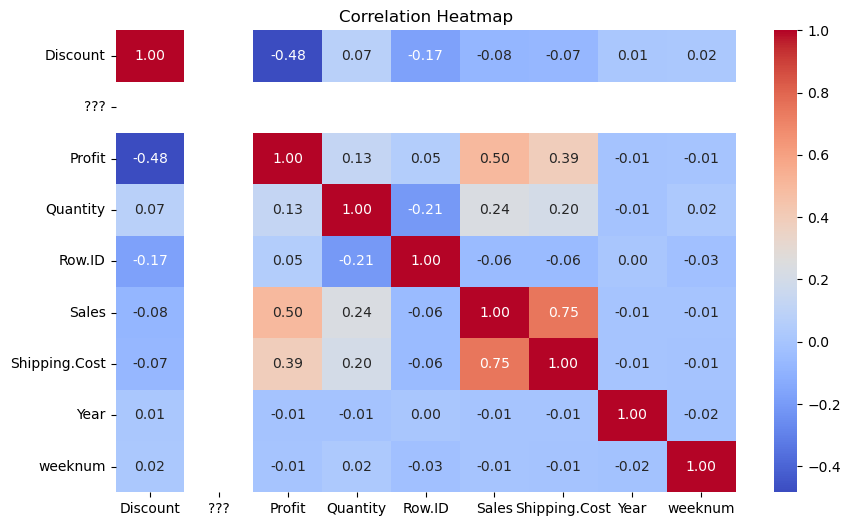

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [18]:
df.to_csv("cleaned_superstore.csv", index=False)
print("✅ Cleaned dataset saved as 'cleaned_superstore.csv'")

✅ Cleaned dataset saved as 'cleaned_superstore.csv'
